##### Project by Viktoriya Georgieva, Serli Holluksever, Sangeeta Kumar, and Tess Messerer

In [ ]:
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

In [ ]:
#Color/wavelength on x-axis. Brightness on y-axis. Color coordinate by galaxy type. Graphs are by redshifts.

https://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?submit=Select&projshort=IRAS

http://ned.ipac.caltech.edu/byname?objname=abell+0023&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

http://skyserver.sdss.org/dr12/en/help/docs/QS_UserGuide.aspx#Spectroscopy "This a a guide to the variables in the table"

'Hey all. I think this is all the coding needed for this project. All thats left is data analysis and writing it up'



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') #It'll give you a pop up just accept it

data = Table.read('/content/gdrive/MyDrive/Skyserver.fits') #lemme know if this gets the file for you :)

data_shortened = data[:5000] #shortening the data to sort easier
#print(data_shortened)

#The data assigned to values. Should be all we need to plot.
redshift, subClass, mag, color = data_shortened['z'], data_shortened['subClass'], data_shortened['z1'], data_shortened['grModelColor'] #gr for visible light

Mounted at /content/gdrive


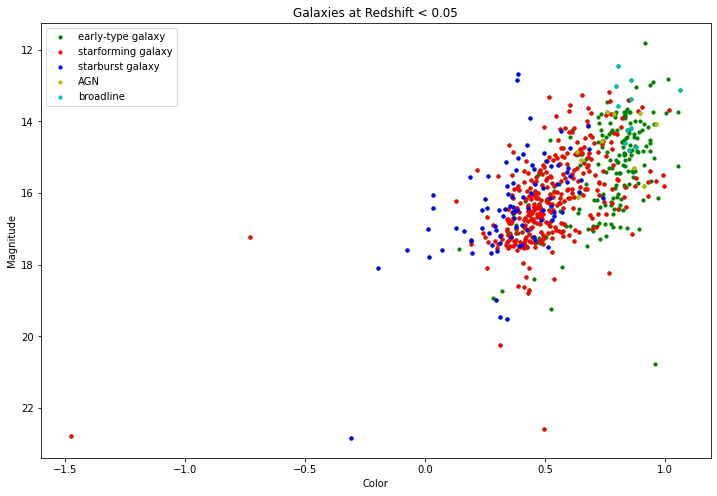

In [ ]:
# data + graph of galaxies with z <= 0.05
def local_galaxies():
  local = np.where(redshift <= 0.05)
  l_subclass = subClass[local]
  l_mag = mag[local]
  l_color = color[local]

  starforming = np.where((l_subclass == 'STARFORMING')&(l_color > -5)&(l_color<5))
  starburst = np.where((l_subclass == 'STARBURST')&(l_color<3))
  agn = np.where(l_subclass == 'AGN')
  broadline = np.where((l_subclass == 'BROADLINE')&(l_color<5))
  normalized = np.where((l_color<3)&(l_color >-2)) #getting rid of the stupid outlier

  plt.figure(figsize = (12,8))
  plt.title('Galaxies at Redshift < 0.05')
  plt.scatter(l_color[normalized], l_mag[normalized], color = 'g', label = 'early-type galaxy',s=10)
  plt.scatter(l_color[starforming], l_mag[starforming], color = 'r', label = 'starforming galaxy',s=10)
  plt.scatter(l_color[starburst], l_mag[starburst], color = 'b', label = 'starburst galaxy',s=10)
  plt.scatter(l_color[agn], l_mag[agn], color = 'y', label = 'AGN',s=10)
  plt.scatter(l_color[broadline], l_mag[broadline], color = 'c', label = 'broadline',s=10)
  plt.gca().invert_yaxis() #inverting the y-axis so the brighter galaxies are at the top
  plt.xlabel('Color')
  plt.ylabel('Magnitude')
  plt.legend()
  plt.show()

local_galaxies()

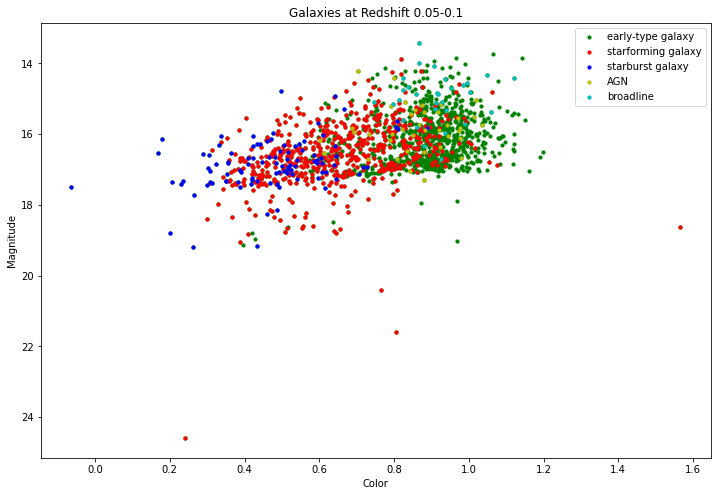

In [ ]:
# data + graph of galaxies with 0.05 <= z <= 0.1

def less_local_galaxies():
  local = np.where((redshift <= 0.1)&(redshift >= 0.05))
  l_subclass = subClass[local]
  l_mag = mag[local]
  l_color = color[local]

  starforming = np.where((l_subclass == 'STARFORMING')&(l_color<3)&(l_color>-0.5))
  starburst = np.where((l_subclass == 'STARBURST')&(l_color<3))
  agn = np.where(l_subclass == 'AGN')
  broadline = np.where((l_subclass == 'BROADLINE')&(l_color<3))
  normalize = np.where((l_color<3)&(l_color>-0.5))

  plt.figure(figsize = (12,8))
  plt.title('Galaxies at Redshift 0.05-0.1')
  plt.scatter(l_color[normalize], l_mag[normalize], color = 'g', label = 'early-type galaxy',s=10)
  plt.scatter(l_color[starforming], l_mag[starforming], color = 'r', label = 'starforming galaxy',s=10)
  plt.scatter(l_color[starburst], l_mag[starburst], color = 'b', label = 'starburst galaxy',s=10)
  plt.scatter(l_color[agn], l_mag[agn], color = 'y', label = 'AGN',s=10)
  plt.scatter(l_color[broadline], l_mag[broadline], color = 'c', label = 'broadline',s=10)
  plt.xlabel('Color')
  plt.ylabel('Magnitude')
  plt.gca().invert_yaxis() #inverting the y-axis so the brighter galaxies are at the top
  plt.legend()
  plt.show()

less_local_galaxies()

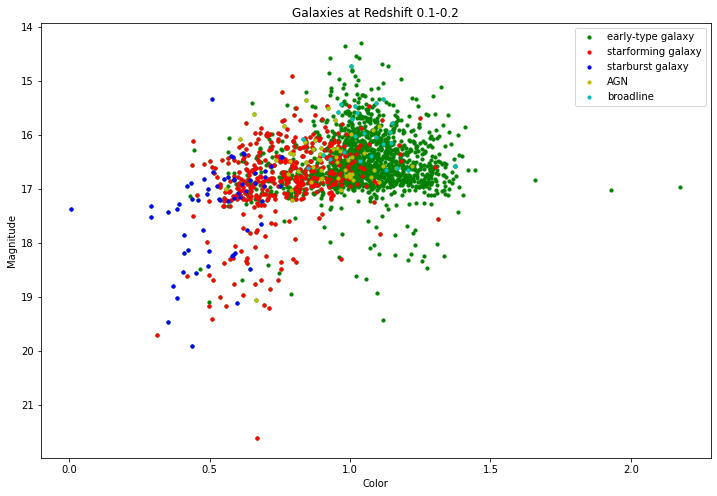

In [ ]:
# data + graph of galaxies with 0.1 <= z <= 0.2
def lesser_local_galaxies():
  local = np.where((redshift >= 0.1)&(redshift<=0.2))
  l_subclass = subClass[local]
  l_mag = mag[local]
  l_color = color[local]

  starforming = np.where((l_subclass == 'STARFORMING')&(l_color<3)&(l_color>-0.5))
  starburst = np.where((l_subclass == 'STARBURST')&(l_color<3)&(l_color>-1))
  agn = np.where(l_subclass == 'AGN')
  broadline = np.where((l_subclass == 'BROADLINE')&(l_color<3))
  normalize = np.where((l_color<3)&(l_color>-0.5))

  plt.figure(figsize = (12,8))
  plt.title('Galaxies at Redshift 0.1-0.2')
  plt.scatter(l_color[normalize], l_mag[normalize], color = 'g', label = 'early-type galaxy',s=10)
  plt.scatter(l_color[starforming], l_mag[starforming], color = 'r', label = 'starforming galaxy', s=10)
  plt.scatter(l_color[starburst], l_mag[starburst], color = 'b', label = 'starburst galaxy',s=10)
  plt.scatter(l_color[agn], l_mag[agn], color = 'y', label = 'AGN',s=10)
  plt.scatter(l_color[broadline], l_mag[broadline], color = 'c', label = 'broadline',s=10)
  plt.xlabel('Color')
  plt.ylabel('Magnitude')
  plt.gca().invert_yaxis() #inverting the y-axis so the brighter galaxies are at the top
  plt.legend()
  plt.show()

lesser_local_galaxies()

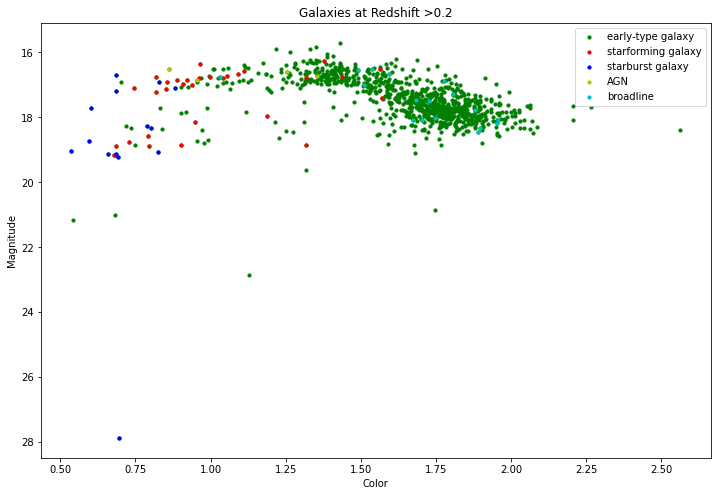

In [ ]:
# data + graph of galaxies with 0.2 <= z
def nonlocal_galaxies():
  local = np.where(redshift >= 0.2)
  l_subclass = subClass[local]
  l_mag = mag[local]
  l_color = color[local]

  starforming = np.where((l_subclass == 'STARFORMING')&(l_color<3)&(l_color>-0.5))
  starburst = np.where((l_subclass == 'STARBURST')&(l_color<3)&(l_color>-1))
  agn = np.where(l_subclass == 'AGN')
  broadline = np.where((l_subclass == 'BROADLINE')&(l_color<3))
  normalize = np.where((l_color<3)&(l_color>0))

  plt.figure(figsize = (12,8))
  plt.title('Galaxies at Redshift >0.2')
  plt.scatter(l_color[normalize], l_mag[normalize], color = 'g', label = 'early-type galaxy',s=10)
  plt.scatter(l_color[starforming], l_mag[starforming], color = 'r', label = 'starforming galaxy', s=10)
  plt.scatter(l_color[starburst], l_mag[starburst], color = 'b', label = 'starburst galaxy',s=10)
  plt.scatter(l_color[agn], l_mag[agn], color = 'y', label = 'AGN',s=10)
  plt.scatter(l_color[broadline], l_mag[broadline], color = 'c', label = 'broadline',s=10)
  plt.xlabel('Color')
  plt.ylabel('Magnitude')
  plt.gca().invert_yaxis() #inverting the y-axis so the brighter galaxies are at the top
  plt.legend()
  plt.show()

nonlocal_galaxies()

# same graphs just with normalized x and y-axes


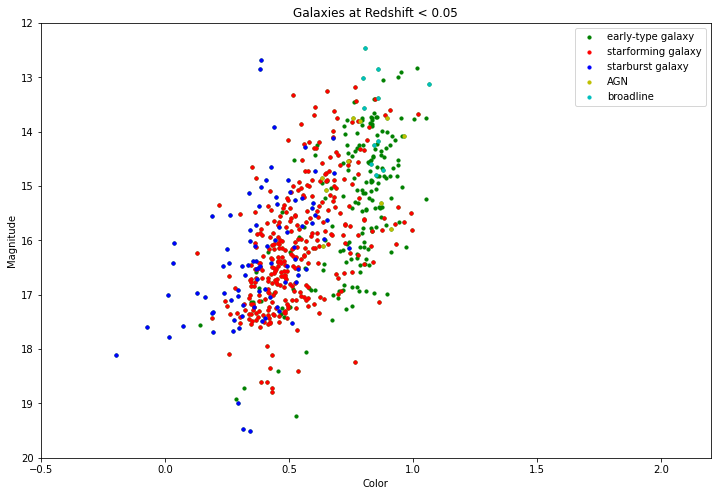

In [ ]:
def local_galaxies():
  local = np.where(redshift <= 0.05)
  l_subclass = subClass[local]
  l_mag = mag[local]
  l_color = color[local]

  starforming = np.where((l_subclass == 'STARFORMING')&(l_color > -5)&(l_color<5))
  starburst = np.where((l_subclass == 'STARBURST')&(l_color<3))
  agn = np.where(l_subclass == 'AGN')
  broadline = np.where((l_subclass == 'BROADLINE')&(l_color<5))
  normalized = np.where((l_color<3)&(l_color >-2)) #getting rid of the stupid outlier

  plt.figure(figsize = (12,8))
  plt.title('Galaxies at Redshift < 0.05')
  plt.scatter(l_color[normalized], l_mag[normalized], color = 'g', label = 'early-type galaxy',s=10)
  plt.scatter(l_color[starforming], l_mag[starforming], color = 'r', label = 'starforming galaxy',s=10)
  plt.scatter(l_color[starburst], l_mag[starburst], color = 'b', label = 'starburst galaxy',s=10)
  plt.scatter(l_color[agn], l_mag[agn], color = 'y', label = 'AGN',s=10)
  plt.scatter(l_color[broadline], l_mag[broadline], color = 'c', label = 'broadline',s=10)
  plt.gca().invert_yaxis() #inverting the y-axis so the brighter galaxies are at the top
  plt.xlabel('Color')
  plt.ylabel('Magnitude')

  plt.xlim([-0.5, 2.2])
  plt.ylim([20, 12])

  plt.legend()
  plt.show()

local_galaxies()

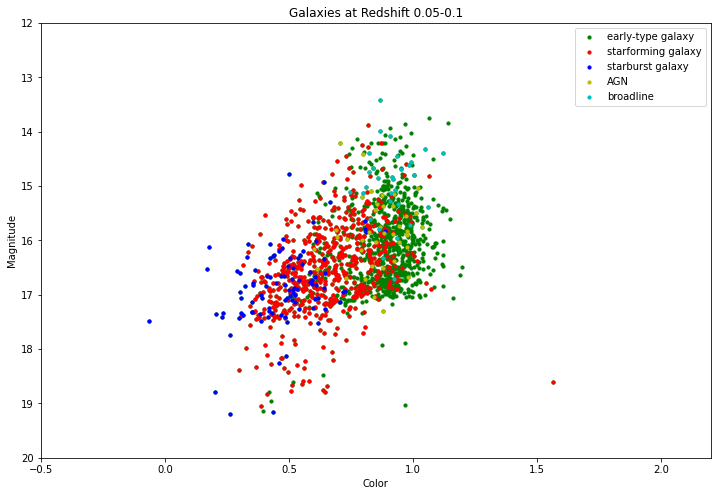

<Figure size 432x288 with 0 Axes>

In [ ]:
def less_local_galaxies():
  local = np.where((redshift <= 0.1)&(redshift >= 0.05))
  l_subclass = subClass[local]
  l_mag = mag[local]
  l_color = color[local]

  starforming = np.where((l_subclass == 'STARFORMING')&(l_color<3)&(l_color>-0.5))
  starburst = np.where((l_subclass == 'STARBURST')&(l_color<3))
  agn = np.where(l_subclass == 'AGN')
  broadline = np.where((l_subclass == 'BROADLINE')&(l_color<3))
  normalize = np.where((l_color<3)&(l_color>-0.5))

  plt.figure(figsize = (12,8))
  plt.title('Galaxies at Redshift 0.05-0.1')
  plt.scatter(l_color[normalize], l_mag[normalize], color = 'g', label = 'early-type galaxy',s=10)
  plt.scatter(l_color[starforming], l_mag[starforming], color = 'r', label = 'starforming galaxy',s=10)
  plt.scatter(l_color[starburst], l_mag[starburst], color = 'b', label = 'starburst galaxy',s=10)
  plt.scatter(l_color[agn], l_mag[agn], color = 'y', label = 'AGN',s=10)
  plt.scatter(l_color[broadline], l_mag[broadline], color = 'c', label = 'broadline',s=10)
  plt.xlabel('Color')
  plt.ylabel('Magnitude')
  plt.gca().invert_yaxis() #inverting the y-axis so the brighter galaxies are at the top

  plt.xlim([-0.5, 2.2])
  plt.ylim([20, 12])

  plt.legend()
  plt.show()

less_local_galaxies()

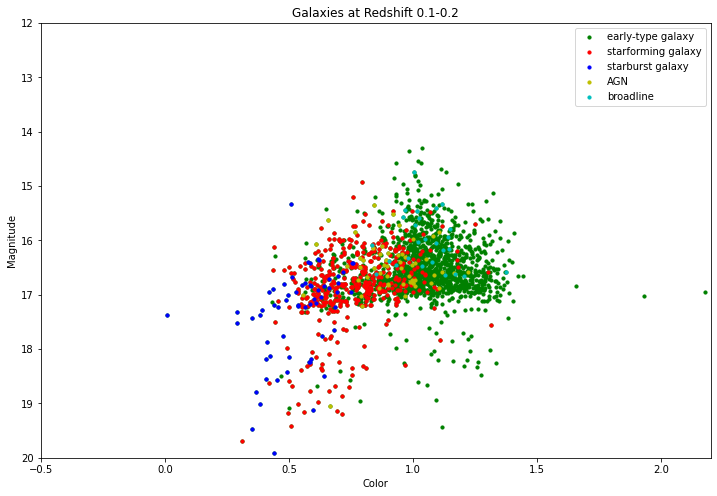

<Figure size 432x288 with 0 Axes>

In [ ]:
def lesser_local_galaxies():
  local = np.where((redshift >= 0.1)&(redshift<=0.2))
  l_subclass = subClass[local]
  l_mag = mag[local]
  l_color = color[local]

  starforming = np.where((l_subclass == 'STARFORMING')&(l_color<3)&(l_color>-0.5))
  starburst = np.where((l_subclass == 'STARBURST')&(l_color<3)&(l_color>-1))
  agn = np.where(l_subclass == 'AGN')
  broadline = np.where((l_subclass == 'BROADLINE')&(l_color<3))
  normalize = np.where((l_color<3)&(l_color>-0.5))

  plt.figure(figsize = (12,8))
  plt.title('Galaxies at Redshift 0.1-0.2')
  plt.scatter(l_color[normalize], l_mag[normalize], color = 'g', label = 'early-type galaxy',s=10)
  plt.scatter(l_color[starforming], l_mag[starforming], color = 'r', label = 'starforming galaxy', s=10)
  plt.scatter(l_color[starburst], l_mag[starburst], color = 'b', label = 'starburst galaxy',s=10)
  plt.scatter(l_color[agn], l_mag[agn], color = 'y', label = 'AGN',s=10)
  plt.scatter(l_color[broadline], l_mag[broadline], color = 'c', label = 'broadline',s=10)
  plt.xlabel('Color')
  plt.ylabel('Magnitude')
  plt.gca().invert_yaxis() #inverting the y-axis so the brighter galaxies are at the top

  plt.xlim([-0.5, 2.2])
  plt.ylim([20, 12])

  plt.legend()
  plt.show()

lesser_local_galaxies()

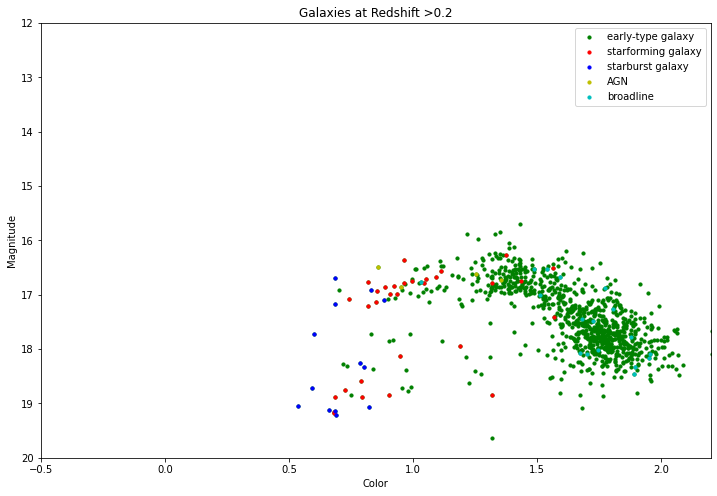

<Figure size 432x288 with 0 Axes>

In [ ]:
def nonlocal_galaxies():
  local = np.where(redshift >= 0.2)
  l_subclass = subClass[local]
  l_mag = mag[local]
  l_color = color[local]

  starforming = np.where((l_subclass == 'STARFORMING')&(l_color<3)&(l_color>-0.5))
  starburst = np.where((l_subclass == 'STARBURST')&(l_color<3)&(l_color>-1))
  agn = np.where(l_subclass == 'AGN')
  broadline = np.where((l_subclass == 'BROADLINE')&(l_color<3))
  normalize = np.where((l_color<3)&(l_color>0))

  plt.figure(figsize = (12,8))
  plt.title('Galaxies at Redshift >0.2')
  plt.scatter(l_color[normalize], l_mag[normalize], color = 'g', label = 'early-type galaxy',s=10)
  plt.scatter(l_color[starforming], l_mag[starforming], color = 'r', label = 'starforming galaxy', s=10)
  plt.scatter(l_color[starburst], l_mag[starburst], color = 'b', label = 'starburst galaxy',s=10)
  plt.scatter(l_color[agn], l_mag[agn], color = 'y', label = 'AGN',s=10)
  plt.scatter(l_color[broadline], l_mag[broadline], color = 'c', label = 'broadline',s=10)
  plt.xlabel('Color')
  plt.ylabel('Magnitude')
  plt.gca().invert_yaxis() #inverting the y-axis so the brighter galaxies are at the top

  plt.xlim([-0.5, 2.2])
  plt.ylim([20, 12])

  plt.legend()
  plt.show()

nonlocal_galaxies()

[]

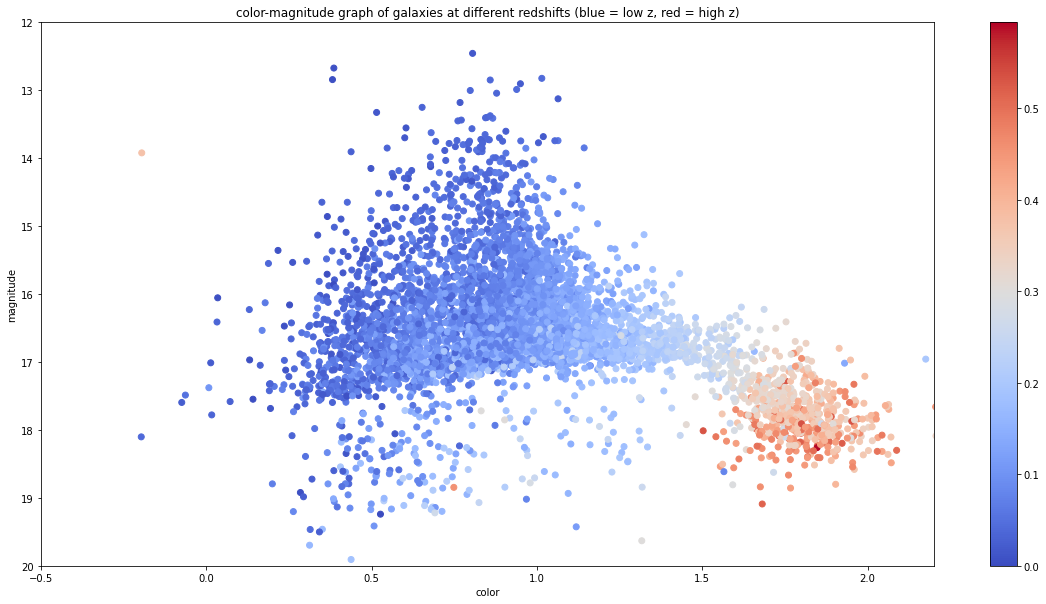

In [ ]:
# graph of all redshifts at once
redshift = np.array(redshift)
color = np.array(color)
magnitude = np.array(mag)

fig = plt.figure(figsize=[20,10], edgecolor='black')
plt.scatter(color, magnitude, c=redshift, cmap='coolwarm')
plt.xlim([-0.5, 2.2])
plt.ylim([20,12])
plt.xlabel('color')
plt.ylabel('magnitude')
plt.title('color-magnitude graph of galaxies at different redshifts (blue = low z, red = high z)')
plt.colorbar()

plt.plot()